In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

## Question1 : Building City class

In [2]:
class City:
    def __init__(self,code,name,region, pop,lat,lon):
        self.code = code
        self.name = name
        self.region = region
        self.pop = pop
        self.lat = lat
        self.lon = lon
    def __str__(self):
        return self.name+","+str(self.pop)+","+str(self.lat)+","+str(self.lon)
    
    def get_population(self):
        return self.pop
    def get_name(self):
        return self.name
    
    def get_latitude(self):
        return self.lat
    def get_longitude(self):
        return self.lon
    
    


## Question 2 : Creating City list

In [3]:
cities_list =[] #initialise emty list
with open('world_cities.txt','r') as cities_file:
    for line in cities_file: #iterate on each line of file
        cities = line.split(",") 
        # assign items from list to variable used as inputs for object
        code = cities[0]
        name = cities[1]
        region = cities[2]
        pop = int(cities[3])
        lat = float(cities[4])
        lon = float(cities[5])
        # append each city object into list
        cities_list.append(City(code,name,region, pop,lat,lon))
        
        

In [4]:
len(cities_list)

47913

In [5]:
type(cities_list)

list

## Question 3: Creating sorted list and saving as txt files

In [6]:
from quicksort import * # import all functions from quicksort

In [7]:
#sort(cities_list[:5],compare_name)

In [8]:
#sort list by alphabetic order of name and then write to txt file
sort(cities_list,compare_name)
with open('cities_alpha.txt', 'w') as f: 
    for item in cities_list:
        f.write("%s\n" % item)

In [9]:
#sort list by population and then write to txt file
sort(cities_list,compare_population)
with open('cities_population.txt', 'w') as f: 
    for item in cities_list:
        f.write("%s\n" % item)

In [10]:
#sort list by latitude and then write to txt file
sort(cities_list,compare_latitude)
with open('cities_latitude.txt', 'w') as f: 
    for item in cities_list:
        f.write("%s\n" % item)

## Question 4 : Map visualization

In [18]:
#from longlat_to_pixel import *

WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)


In [31]:
x_cord =[] # initialise x cordinates list
y_cord=[]   # initialise y cordinates list
name_list = []
with open('cities_population.txt','r') as cities_pop:
    for line in cities_pop: #iterate on each line of file
        cities = line.split(",")
        name = cities[0]
        lat = float(cities[2]) # extract latitude 
        lon = float(cities[3])  # extract longtude 
        x,y = longlat_to_pixel(lat, lon) # convert lat/long to pixel locations
        x_cord.append(x)
        y_cord.append(y)
        name_list.append(name)



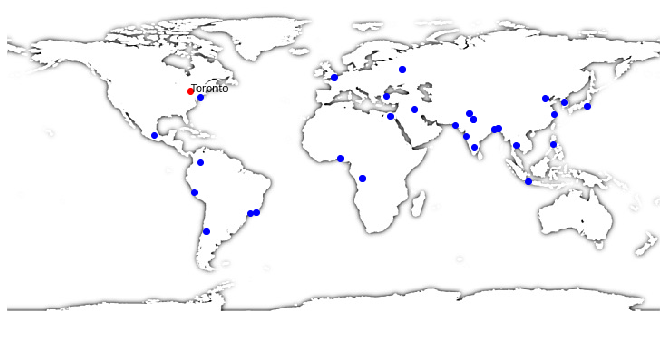

In [32]:
img = plt.imread("world.jpg")

for i in range(len(x_cord[:30])):
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    plt.plot(x_cord[:i], y_cord[:i], 'bo') # plot remaining blue data point
    plt.plot(x_cord[i], y_cord[i], 'ro') # plot one red data point
    plt.annotate(name_list[i], 
             xy=(x_cord[i], y_cord[i]))# including annotation       
    plt.show()
    time.sleep(1)
    clear_output(wait=True)

